# Многорукие бандиты

*Подготовил Ян Пиле*

## Традиционное АБ-тестирование

На веб-сайтах сегодня постоянно происходит проверка разного рода гипотез. Какой должна быть кнопка "Купить" : красной или синей? Какой заголовок привлекает больше всего кликов к этой новостной статье? На какую версию рекламы больше кликают? 

Чтобы определить оптимальный ответ на эти вопросы, используют A/B-тесты - статистически обоснованный метод сравнения версий A и B. 

По сути, в ходе тестирования аналитик пытается определить, совпадают ли значения некой величины в группах А и В, или различие в ней на самом деле случайность?

**A/B-тестирование** основано на классическом понимании статистической значимости. Когда мы придумываем новую функциональность продукта, мы хотим проверить, полезна ли она, прежде чем запускать ее для всей пользовательской базы. 

В тесте обычно участвуют две группы: группа, получающая новую функциональность, (Treatment) и контрольная группа (Control). Затем мы измеряем ключевой показатель для обеих групп, например: 

* среднее время пребывания на сайте (социальная сеть), 
* среднее время оформления заказа (электронная коммерция) 
* CTR или кол-во кликов (онлайн-реклама). 

Разница между группами проверяется на статистическую значимость.
Классический статистический тест при правильном проведении (например z-тест, t-тест) гарантирует, что количество ложных срабатываний(FPR или ошибок первого рода) не превышает $\alpha$ (часто берут 5%). Это означает, что при отсутствии разницы между экспериментальной и контрольной группой тест будет показывать значимое отличие не более чем в 5% случаев.

Сбалансированный A/B-тест распределяет равное количество трафика на каждую группу в течение всего времени эксперимента. Мы при этом не можем регулировать распределение трафика во время теста в зависимости от того, что наблюдается. По сути, недостаток A / B-тестирования очевиден: если экспериментальная группа явно превосходит результаты контрольной, нам все равно придется потратить много трафика на контрольную группу, чтобы получить статистическую значимость.

# А можно ли по-другому?

## Exploration vs Exploitation 

Компромисс между исследованием неизученных областей и применением имеющихся знаний (Exploration vs Exploitation tradeoff) часто возникает и в реальной жизни. Возьмем в качестве примера ваш любимый ресторан. Если вы будете ходить туда каждый день, вы всегда будете уверены в том, что получите, но каждый раз будете упускать возможность найти ресторан лучше, вкуснее и дешевле. Если вы напротив все время пробуете новые места, скорее всего, вам придется время от времени есть дрянную еду. Такая задачка была в знаменитых [Фейнмановских лекциях](https://www.feynmanlectures.caltech.edu/info/exercises/Feynmans_restaurant_problem.html) по физике. К слову, рекомендую посмотреть ее решение или попытаться решить ее самостоятельно.

АБ-тест чем-то на это похож: у нас есть несколько вариантов рекламы, но мы не знаем, на каком из них мы заработаем наибольшую сумму. Мы можем распределить равную долю трафика на эти варианты и подождать значимости результатов, а можем придумать стратегию, по которой будем перераспределять трафик в зависимости от того, какие результаты будем наблюдать. Давайте поставим нашу задачу чуть более формально:

# Задача о многоруком бандите

Представьте, что вы находитесь в казино перед несколькими игровыми автоматами, и каждый из них настроен с неизвестной вероятностью того, что вы можете получить вознаграждение за одну игру. Возникает вопрос: какова наилучшая стратегия, чтобы получить максимальный выигрыш при условии, что вы не знаете вероятности?

<img src="https://miro.medium.com/max/3088/1*5q0Mihf29fftuXpKWWX2uA.png">

Мы для определенности будем считать, что каждый игровой автомат - показ определенного типа рекламного баннера, а стоимость кликов в баннер одинаковая. При этих условиях выигрыш от выбора каждого баннера будет случайной величиной Бернуллиевского типа вида $X_i \sim reward * Ber(p_i)$, где $reward$ - стоимость клика в баннер, а $p_i$ - неизвестная нам вероятность клика в i-тый баннер. На оптимизационную задачу наш постоянный коэффициент $reward$ не повлияет, поэтому будем считать, что выигрыш это 0 или 1.

# Математическая формулировка

Бернуллиевский многорукий бандит может быть описан как пара $(A,R)$, где

* У нас есть $K$ вариантов (баннеров/ручек) с неизвестными вероятностями "выигрыша" $(\theta_1,...,\theta_K)$
* В каждый момент времени $t$ мы "дергаем за одну из ручек" (например для каждого приходящего пользователя принимаем решение, какой баннер ему показать) и получаем "выигрыш" $r$ (он может быть равен 0).
* $A$ - множество действий, которые мы предприняли (каждое действие - взаимодействие с одной из ручек бандита), В результате каждого действия $a$ мы получаем "выигрыш" $Q(a)$, причем $Q(a) = E(r|a) = \theta$. Если в результате действия $a_t$ в момент времени $t$ мы дернули за ручку $i$, то $Q(a_t) = \theta_i$
* $R$ - функция выигрыша. В нашем случае в каждый момент времени $t$ $r_t = R(a_t)$ равен 1, если человек кликнул в баннер, и это произойдет с вероятностью $Q(a_t) = \theta_i$, или равен 0, если человек в баннер не кликнул, и это произойдет с вероятностью $1 - \theta_i$


### Цель

Наша задача состоит в том, чтобы максимизировать наш выигрыш за $T$ шагов, то есть:

$$maximize(\sum^T_{i=1}r_i)$$

Чтобы это сделать, нам нужно попытаться идентифицировать ручку с максимальным выигрышем $\theta^*$:

$$\theta^* = Q(a^*) = max_{a \in A}(Q(a)) = max_{1\le i \le K}(\theta_i)$$

Функция потерь (нашей ошибки), которая в этом случае возникает из-за неверно выбранной ручки, выглядит так:

$$ L_T = E(\sum^T_{i=1}(\theta^* - Q(a_t)))$$

# Стратегии

1) Никакого исследования новых ручек, всегда берется лучший результат первой итерации. Это называется жадной стратегией и она работает очень плохо (причина совершенно ясна)

2) Исследование новых ручек случайное: Преимущественно берется результат, показавший себя лучше всего, но в каком-то проценте случаев исследуется случайная ручка

3) Более умная стратегия

Вариант один мы даже моделировать не будем.

# $\epsilon$-жадная стратегия

$\epsilon$-жадный алгоритм большую часть времени выбирать ручку, которая к настоящему моменту показала себя лучшей, но иногда выполняет случайное исследование новых ручек. Ценность каждого действия оценивается путем усреднения вознаграждений, связанных с целевым действием a, которые мы наблюдали до текущего временного шага t:

$$\hat Q_t(a) = \dfrac{1}{N_t(a)}\sum^t_{\tau = 1}r_t[a_t==a]$$

Здесь [] - индикаторная функция, равная 1, если внутри истинное утверждение и 0, если ложное. $N_t(a)$ - количество раз, в которых было выбрано действие $a$.

Согласно $\epsilon$-жадному алгоритму с малой вероятностью $\epsilon$ мы предпринимаем случайное действие(выбираем случайную ручку), а с вероятностью $1 - \epsilon$ выбираем наилучшее на данный момент действие (оценивается по доле выигрышей).

# Upper Confidence Bounds. алгоритм UCB1

Случайное исследование в предыдущей стратегии дает нам возможность как-то опробовать варианты, о которых мы ничего не знали. Тем не менее, из-за случайности, вероятно, что мы будем исследуем действие, которое себя плохо зарекомендовалов прошлом (скажем, у какой-то ручки доля кликов в 10 раз меньше остальных вариантов, а мы все равно продолжаем ее исследовать). Чтобы избежать такого малоэффективного исследования новых ручек, можно попробовать уменьшать параметр $\epsilon$ со временем, или можно попытаться оцифровать то, насколько достоверна наша текущая оценка вероятности выигрыша в конкретной ручке (если мы уже 125 раз дернули ручку А и она все время показывает себя хуже остальных, надо дергать ее пореже). Давайте будем дергать те ручки, относительно которых высока неопределенность нашей оценки, а те, относительно которых неопределенность мала(мы уверены в текущем измеренном результат), дергать будем реже. Другими словами, мы предпочитаем исследование тех ручек, у которых высок потенцил для получения оптимального выигрыша. Звучит мудрено :) но посмотрим это явно с помощью алгоритма UCB.

Наш алгоритм **Upper Confidence Bounds (UCB)** измеряет такой потенциал с помощью оценки сверху доверительной границы значения вознаграждения, которое мы можем с этой ручки получить. Обозначим эту оценку за $\hat U_t(a)$. Раз у нас оценка сверху то истинное значение с большой вероятностью должно находиться ниже нашего измеренного значения + наша оценка доверительной границы:

$$Q(a)\le \hat Q_t(a) + \hat U_t(a)$$

При этом оценка $\hat U_t(a)$ зависит от $N_t(a)$ (большее кол-во попыток должно уменьшать $\hat U_t(a)$, то есть наша оценка становится точнее.

В алгоритме UCB мы всегда выбираем такое действие, которое максимизирует нашу оценку:

$$a^{UCB}_t = argmax_{a \in A} \hat Q_t(a) + \hat U_t(a)$$

Остается понять, как нам, собственно, оценить $\hat U_t(a)$



# Неравенство Хёффдинга

Чтобы оценить нашу границу, не привязываясь к явному виду распределения, воспользуемся [неравенством Хёффдинга](http://cs229.stanford.edu/extra-notes/hoeffding.pdf). Это общее утверждение, которое справедливо для всех ограниченных вероятностных распределений(но мы его сформулируем для ограниченных на интервале $[0,1]$:

Пусть $X_1 ... X_t$ - независимые, одинаково распределенные случайные величины, каждая из которых находится в интервале $[0,1]$, тогда для любого $u > 0$ справедливо неравенство:

$$P(E[X] > \bar{X_t}+u) \le e^{-2tu^2} \text{ , где } \bar{X_t} = \dfrac{1}{t}\sum^t_{\tau = 1}X_{\tau}$$

Теперь переведем это утверждение на язык наших ручек и выигрышей. У нас:

* $r_t(a)$ - случайные величины из формулировки теоремы
* $Q(a)$ - истинное значение среднего (вероятность выигрыша)
* $\hat Q_t(a)$ - выборочная оценка среднего на шаге $t$(вероятность выигрыша, оцененная по выборке)
* $u = \hat U_t(a)$ - наша оценка $UCB$

Значит для нашего бандитского эксперимента оценка примет вид:

$$P(Q(a) > \hat Q_t(a) + \hat U_t(a)) \le e^{-2t(\hat U_t(a))^2}$$

Мы хотим выбрать границу так, чтобы с большой вероятностью истинное среднее оказывалось меньше, чем сумма выборочной оценки и оценки $UCB$. Таким образом вероятность $e^{-2t(\hat U_t(a))^2}$ должна быть маленькой величиной. Допустим, это какая-то маленькая вероятность $p$, тогда:

$$e^{-2t(\hat U_t(a))^2} = p \text{ или, иначе говоря:}$$

$$U_t(a) = \sqrt{\dfrac{-logp}{2N_t(a)}}$$







# UCB1

Давайте будем со временем уменьшать порог по вероятности (это мы такую эвристику придумали). Договоримся, что $$p = t^{-4}$$

Тогда мы получим:
$$U_t(a) = \sqrt{\dfrac{2logt}{N_t(a)}}$$

Значит наша задача принимает вид:

$$a^{UCB1}_t = argmax_{a \in A} \hat Q_t(a) + \sqrt{\dfrac{2logt}{N_t(a)}}$$


# Байесовская UCB

В алгоритме UCB1 мы не делаем никаких предположений о распределении вознаграждения, и поэтому приходится полагаться на общую оценку через неравенство Хёффдинга. Если мы сможем заранее узнать распределение, границы можно будет оценить лучше.

Например, если мы ожидаем, что среднее вознаграждение каждого игрового автомата можно приблизить нормальным, мы можем установить верхнюю границу как 95% доверительный интервал, установив $\hat U_t(a)$ равным  удвоенному или утроенному стандартному отклонению (то самое правило двух/трех сигм) Бета-распределения для указанного бандита (для каждого считаем количество успехов и не-успехов - они и будут параметрами нашего распределения).

Если наши выигрыши распределены по Бернулли(а это так и есть), теорема Байеса нам подсказывает, что априорное и апостериорное распределения для оцениваемых параметров можно выбрать в виде Бета-распределения. Тогда при появлении новых данных мы будем обновлять параметры апостериорного распределения и точнее угадывать нужную нам ручку. Про обновление параметров бета-распределения хорошо почитать в [этой](https://arxiv.org/pdf/1709.03162.pdf) статье.

Решение примет вид:
$$a^{Bayes\ UCB}_t = argmax_{a \in A} \hat Q_t(a) + 2\sigma(Beta_a)$$

# Сэмплирование Томпсона

На каждом временном шаге в этом методе мы хотим выбирать действие a в соответствии с вероятностью того, что оно является оптимальным. Оценивается это так:

$$\pi(a|h_t) = P[Q(a) > Q(a'), \forall a' \not = a|h_t] = E_{R|h_t}[1(a= argmax_{a \in A}Q(a))]$$

Здесь $\pi(a|h_t)$ - вероятность принятия решения $a$ при условии истории $h_t$ - набора предыдущих действий.

Для Бернуллиевского бандита логичным(как и в предыдущем случае) кажется моделировать $Q(a)$ с помощью бета-распределения, так как $Q(a)$ есть неизвестное $\theta$ для распределения Бернулли. Значение $Beta(\alpha,\beta)$ находится в интервале $[0,1]$, $\alpha$ и $\beta$ соответствуют количеству "успехов"(когда мы получили выигрыш) и "неудач"(когда мы не получили выигрыш) соответственно.

Инициализируем параметры $\alpha$ и $\beta$ нашего бета-распределения на основе некоторых априорных знаний или убеждений для каждой ручки, например:

* При $\alpha = 1$ и $\beta = 1$ мы ожидаем вероятность выигрыша 50%, но при этом не очень уверены.
* При $\alpha = 1000$ и $\beta = 9000$ мы крайне уверены, что вероятность выигрыша составляет 10%

В каждый момент времени $t$ мы сэмплируем ожидаемый выигрыш $\hat Q_t(a)$ из априорного бета-распределения $Beta(\alpha_i,\beta_i)$ для каждого действия. Лучшее действие выбирается среди вариантов $a^{TS}_t = argmax_{a \in A}\hat Q(a)$. Затем мы получаем истинное значение выигрыша, и можем соответствующим образом обновить бета-распределение, которое по сути делает байесовский вывод для вычисления апостериорного значения с известным априорным значением и правдоподобием получения выборочных данных.

$\alpha_i \leftarrow \alpha_i + r_t[a^{TS}_t==a]$

$\beta_i \leftarrow \beta_i + (1-r_t)[a^{TS}_t==a]$

Получаемые нами оценки вознаграждения $\hat Q(a)$ сэмплируются из апостериорных распределений, каждая из получаемых вероятностей эквивалентна вероятности того, что соответствующее действие является оптимальным при условии наблюдаемой истории :)

Тем не менее, для многих практических  оценка апостериорных распределений может оказаться сложной с вычислительной точки зрения оценить апостериорные распределения по наблюдаемому истинному выигрышу с использованием байесовского вывода. Сэмплирование Томпсона все еще будет работать, если мы сможем аппроксимировать апостериорные распределения, используя какие-то приближенные методы, как, например, сэмплирование Гиббса, аппроксимация Лапласа или бутстрэп. Семплировании Томпсона - одно из лучших решений задачи о многоруком бандите(вы скоро это увидите), поэтому изучить его поглубже совершенно точно стоит. Рекомендуется прочесть [этот](https://arxiv.org/pdf/1707.02038.pdf) материал.

# Имплементация вышеописанных стратегий

## Общий класс для N-рукого бандита

In [9]:
import time
import numpy as np
from scipy.stats import beta

# Общий класс для Бернуллиевских бандитов
class BernoulliBandit():

    def __init__(self, n, probas=None):
        assert probas is None or len(probas) == n
        
        # Кол-во ручек
        self.n = n
        
        if probas is None:
            np.random.seed(int(time.time()))
            # Истинные вероятности ручек (случайно заданные)
            self.probas = [np.random.random() for _ in range(self.n)]
        else:
            # Истинные вероятности ручек, если заданы в функции
            self.probas = probas

        # Вероятность оптимальной ручки
        self.best_proba = max(self.probas)

    def generate_reward(self, i):
        # Генерация "выигрыша" для i-той ручки бандита
        if np.random.random() < self.probas[i]:
            return 1
        else:
            return 0

## Общий класс для стратегии решения задачи N-рукого бандита

In [261]:
# Класс для имплементации решения проблемы с бандитами 

class Solver(object):    
    def __init__(self, bandit):
        """
        bandit (Bandit): Инициализация бандита.
        """
        assert isinstance(bandit, BernoulliBandit)
        np.random.seed(int(time.time()))

        self.bandit = bandit

        self.counts = [0] * self.bandit.n
        self.actions = []  # Список id ручек от 0 до bandit.n-1.
        self.regret = 0.  # Суммарная ошибка.
        self.regrets = [0.]  # История суммарной ошибки.
        self.reward = 0. # Суммарный выигрыш.
        self.rewards = [0.] # История суммарного выигрыша.

    def update_regret(self, i):
        # i (int): Индекс выбранной ручки.
        self.regret += self.bandit.best_proba - self.bandit.probas[i]
        self.regrets.append(self.regret)
        
    def update_reward(self, i):
        # i (int): Индекс выбранной ручки.
#         self.reward += self.bandit.best_lambda_EV - 1/self.bandit.lambdas[i]
        self.rewards.append(self.reward)

    # Dummy-метод оценки вероятностей (переопределяется для каждого solver'a)    
    @property
    def estimated_probas(self):
        raise NotImplementedError
    
    # Dummy-метод перехода на следующий шаг (переопределяется для каждого solver'a)   
    def run_one_step(self):
        """Return the machine index to take action on."""
        raise NotImplementedError

    # Запуск работы бандита на num_steps шагов
    def run(self, num_steps):
        assert self.bandit is not None
        for _ in range(num_steps):
            i = self.run_one_step()

            self.counts[i] += 1
            self.actions.append(i)
            self.update_regret(i)
            self.update_reward(i)

## Классы для разных стратегий решения задачи N-рукого бандита

# $\epsilon$-жадная стратегия

In [262]:
class EpsilonGreedy(Solver):
    def __init__(self, bandit, eps, initial_proba=1.0):
        """
        eps (float): Вероятность исследования случайной ручки.
        init_proba (float): начальное значение =  1.0;
        """
        # Сделали бандита
        super(EpsilonGreedy, self).__init__(bandit)

        assert 0. <= eps <= 1.0
        # Задали epsilon
        self.eps = eps
        
        self.estimates = [initial_proba] * self.bandit.n  # Оптимистичная инициализация

    @property
    def estimated_probas(self):
        return self.estimates

    def run_one_step(self):
        if np.random.random() < self.eps:
            # Дернули случайную ручку
            i = np.random.randint(0, self.bandit.n)
        else:
            # Выбрали наилучшую (на данный момент) ручку
            i = max(range(self.bandit.n), key=lambda x: self.estimates[x])

        r = self.bandit.generate_reward(i)
        
        self.reward += r
        
        # Оценка для i-того бандита обновляется
        self.estimates[i] += 1. / (self.counts[i] + 1) * (r - self.estimates[i])

        return i

# UCB1 стратегия

In [263]:
class UCB1(Solver):
    def __init__(self, bandit, initial_proba=1.0):
        super(UCB1, self).__init__(bandit)
        self.t = 0
        self.estimates = [initial_proba] * self.bandit.n

    @property
    def estimated_probas(self):
        return self.estimates

    def run_one_step(self):
        self.t += 1

        # Выбрать лучшую ручку с учетом UCB.
        i = max(range(self.bandit.n), key=lambda x: self.estimates[x] + np.sqrt(
            2 * np.log(self.t) / (1 + self.counts[x])))
        r = self.bandit.generate_reward(i)
        
        self.reward += r

        self.estimates[i] += 1. / (self.counts[i] + 1) * (r - self.estimates[i])

        return i


# Байесовская UCB стратегия

In [264]:
class BayesianUCB(Solver):
    """Предположим априорное Бета-распределение."""

    def __init__(self, bandit, c=2, init_a=1, init_b=1):
        """
        c (float): Сколько стандартных отклонений рассматривать в качестве UCB.
        init_a (int): Исходное значение a в Beta(a, b).
        init_b (int): Исходное значение b в Beta(a, b).
        """
        super(BayesianUCB, self).__init__(bandit)
        self.c = c
        self._as = [init_a] * self.bandit.n
        self._bs = [init_b] * self.bandit.n

    @property
    def estimated_probas(self):
        return [self._as[i] / float(self._as[i] + self._bs[i]) for i in range(self.bandit.n)]

    def run_one_step(self):
        # Выбрать лучшую ручку с учетом UCB.
        i = max(
            range(self.bandit.n),
            key=lambda x: self._as[x] / float(self._as[x] + self._bs[x]) +\
            beta.std(self._as[x], self._bs[x]) * self.c
        )
        r = self.bandit.generate_reward(i)
        
        self.reward += r
        # Обновление апостериорного бета-распределения
        self._as[i] += r
        self._bs[i] += (1 - r)

        return i

# Сэмплирование Томпсона

In [265]:
class ThompsonSampling(Solver):
    def __init__(self, bandit, init_a=1, init_b=1):
        """
        init_a (int): Исходное значение a в Beta(a, b).
        init_b (int): Исходное значение b в Beta(a, b).
        """
        super(ThompsonSampling, self).__init__(bandit)

        self._as = [init_a] * self.bandit.n
        self._bs = [init_b] * self.bandit.n

    @property
    def estimated_probas(self):
        return [self._as[i] / (self._as[i] + self._bs[i]) for i in range(self.bandit.n)]

    def run_one_step(self):
        samples = [np.random.beta(self._as[x], self._bs[x]) for x in range(self.bandit.n)]
        i = max(range(self.bandit.n), key=lambda x: samples[x])
        r = self.bandit.generate_reward(i)
        
        self.reward += r
        self._as[i] += r
        self._bs[i] += (1 - r)

        return i

# Рисовалка результатов

In [266]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


def plot_results(solvers, solver_names):
    """
    Отрисовка результатов различных стратегий для бандитов.
    Args:
        solvers (list с типом Solver): Список решений проблемы бандитов, которые нужно подгонять.
        solver_names (list с типом str)
    """
    assert len(solvers) == len(solver_names)
    assert all(map(lambda s: isinstance(s, Solver), solvers))
    assert all(map(lambda s: len(s.regrets) > 0, solvers))

    b = solvers[0].bandit

    fig = plt.figure(figsize=(15, 15))

    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)
    
    for i, s in enumerate(solvers):
        ax4.plot(range(len(s.rewards)), s.rewards, label=solver_names[i])

    ax4.set_xlabel('Время')
    ax4.set_ylabel('Выигрыш')
    
    # Рисунок. 1: Зависимость ошибки от времени.
    for i, s in enumerate(solvers):
        ax1.plot(range(len(s.regrets)), s.regrets, label=solver_names[i])

    ax1.set_xlabel('Время')
    ax1.set_ylabel('Накопленная ошибка')
    ax1.legend(loc=9, bbox_to_anchor=(1.82, -0.25), ncol=5)
    ax1.grid('k', ls='--', alpha=0.3)    

    # Рисунок. 2: Вероятности, оцененные алгоритмами.
    sorted_indices = sorted(range(b.n), key=lambda x: b.probas[x])
    ax2.plot(range(b.n), [b.probas[x] for x in sorted_indices], 'k--', markersize=12)
    for s in solvers:
        ax2.plot(range(b.n), [s.estimated_probas[x] for x in sorted_indices], 'x', markeredgewidth=2)
    ax2.set_xlabel('Ручки, отсортированные по ' + r'$\theta$')
    ax2.set_ylabel('Оцененная алгоритмом '+ r'$\hat\theta$')
    ax2.grid('k', ls='--', alpha=0.3)

    # Рисунок 3: Кол-во действий
    for s in solvers:
        ax3.plot(range(b.n), np.array(s.counts) / float(len(solvers[0].regrets)), ds='steps', lw=2)
    ax3.set_xlabel('Ручки')
    ax3.set_ylabel('Доля каждой ручки в общем кол-ве действий')
    ax3.grid('k', ls='--', alpha=0.3)
    
    plt.show()

## Функция для решения задачи о K-руком бандите за N испытаний

In [269]:
def experiment(K, N, probas = []):
    """
    Прогонка эксперимента с бернуллиевским бандитом с K руками,
    в каждой из которых случайно задается вероятность выигрыша.
    Args:
        K (int): Кол-во ручек.
        N (int): Кол-во испытаний.
        test_solvers: Список моделей решения задачи о Бандите(эпсилон-жадная, UCB и тд)
        names: Список названий стратегий для графиков
    """
    if probas == []:
        probas = list(np.round(np.random.random(K),2))
    b = BernoulliBandit(K, probas = probas)
    print("Истинные вероятности выигрыша у Бернуллиевского бандита:\n", b.probas)
    print("У лучшей ручки индекс: {} и вероятность: {}".format(
        max(range(K), key=lambda i: b.probas[i]), max(b.probas)))
    
    test_solvers = [
#         EpsilonGreedy(b, eps = 0, initial_proba = 0),
#         EpsilonGreedy(b, 1),
        EpsilonGreedy(b, 0.01),
        UCB1(b),
        BayesianUCB(b, 3, 1, 1),
        ThompsonSampling(b, 1, 1)
    ]
    names = [
#         'Full-exploitation',
#         'Full-exploration',
        r'$\epsilon$' + '-Greedy',
        'UCB1',
        'Bayesian UCB',
        'Thompson Sampling'
    ]

    for s in test_solvers:
        s.run(N)

    plot_results(test_solvers, names)

## Эксперимент

In [230]:
1/16+3/8+1/4

0.6875

Истинные вероятности выигрыша у Бернуллиевского бандита:
 [0.63, 0.2, 0.02, 0.18, 0.05, 0.91, 0.61, 0.01, 0.02, 0.95]
У лучшей ручки индекс: 9 и вероятность: 0.95


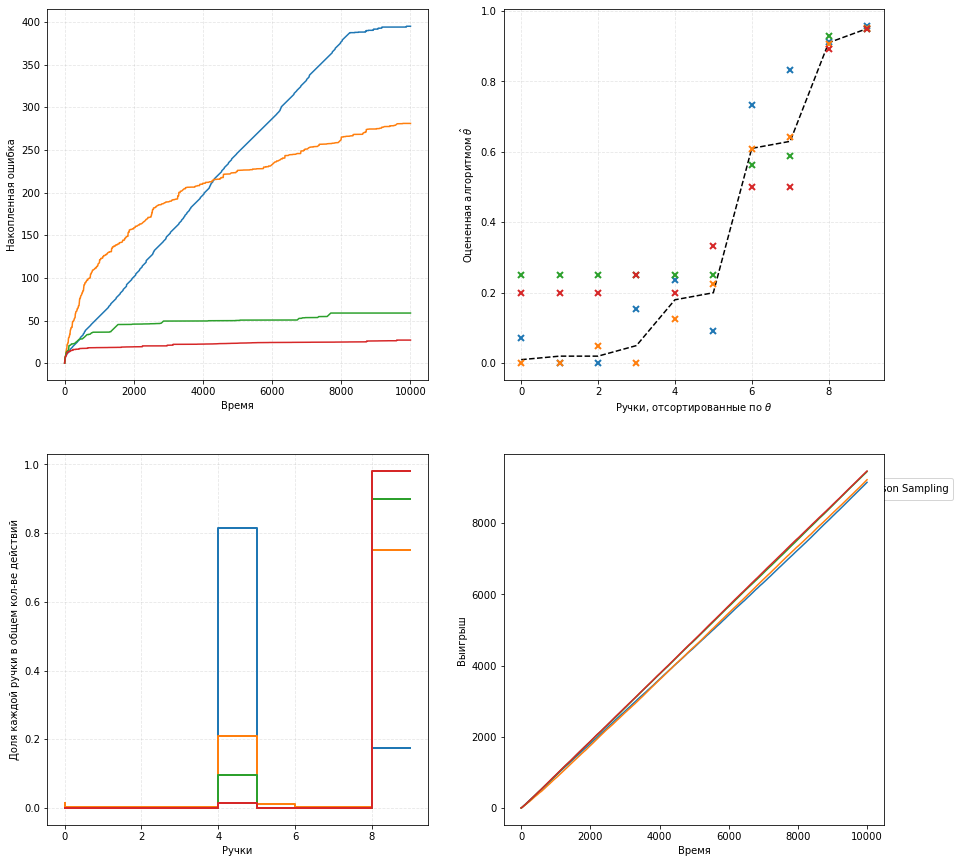

In [271]:
experiment(10, 10000,[0.63, 0.2, 0.02, 0.18, 0.05, 0.91, 0.61, 0.01, 0.02, 0.95])

# Экспоненциальный бандит

In [10]:
# Общий класс для Бернуллиевских бандитов
class ExponentialBandit():

    def __init__(self, n, lambdas=None, scale = 10):
        assert lambdas is None or len(lambdas) == n
        
        # Кол-во ручек
        self.n = n
        
        if lambdas is None:
            np.random.seed(int(time.time()))
            # Истинные lambda ручек (случайно заданные)
            self.lambdas = [round(np.random.random()*scale,2) for _ in range(self.n)]
        else:
            # Истинные вероятности ручек, если заданы в функции
            self.lambdas = lambdas
            

        # Среднее оптимальной ручки
        self.best_lambda_EV = 1/min(self.lambdas)

    def generate_reward(self, i):
        # Генерация "выигрыша" для i-той ручки бандита
        return np.random.exponential(1/self.lambdas[i])

In [11]:
class BanditSolver(object):    
    def __init__(self, bandit):
        """
        bandit (Bandit): Инициализация бандита.
        """
        assert isinstance(bandit, ExponentialBandit)
        np.random.seed(int(time.time()))

        self.bandit = bandit

        self.counts = [0] * self.bandit.n
        self.actions = []  # Список id ручек от 0 до bandit.n-1.
        self.regret = 0.  # Суммарная ошибка.
        self.regrets = [0.]  # История суммарной ошибки.
        
        self.reward = 0. # Суммарный выигрыш.
        self.rewards = [0.] # История суммарного выигрыша.

    def update_regret(self, i):
        # i (int): Индекс выбранной ручки.
        self.regret += self.bandit.best_lambda_EV - 1/self.bandit.lambdas[i]
        self.regrets.append(self.regret)
        
    def update_reward(self, i):
        # i (int): Индекс выбранной ручки.
#         self.reward += self.bandit.best_lambda_EV - 1/self.bandit.lambdas[i]
        self.rewards.append(self.reward)

    # Dummy-метод оценки lambda (переопределяется для каждого solver'a)    
    @property
    def estimated_1_over_lambdas(self):
        raise NotImplementedError
    
    # Dummy-метод перехода на следующий шаг (переопределяется для каждого solver'a)   
    def run_one_step(self):
        """Return the machine index to take action on."""
        raise NotImplementedError

    # Запуск работы бандита на num_steps шагов
    def run(self, num_steps):
        assert self.bandit is not None
        for _ in range(num_steps):
            i = self.run_one_step()

            self.counts[i] += 1
            self.actions.append(i)
            self.update_regret(i)
            self.update_reward(i)

In [12]:
class EpsilonGreedy(BanditSolver):
    def __init__(self, bandit, eps, initial_lambda=1.0):
        """
        eps (float): Вероятность исследования случайной ручки.
        initial_lambda (float): начальное значение =  1.0;
        """
        # Сделали бандита
        super(EpsilonGreedy, self).__init__(bandit)

        assert 0. <= eps <= 1.0
        # Задали epsilon
        self.eps = eps
        
        self.estimates = [initial_lambda] * self.bandit.n  # Оптимистичная инициализация

    @property
    def estimated_1_over_lambdas(self):
        return self.estimates

    def run_one_step(self):
        if np.random.random() < self.eps:
            # Дернули случайную ручку
            i = np.random.randint(0, self.bandit.n)
        else:
            # Выбрали наилучшую (на данный момент) ручку
            i = max(range(self.bandit.n), key=lambda x: self.estimates[x])

        r = self.bandit.generate_reward(i)
        
        self.reward += r
        
        
        # Оценка для i-того бандита обновляется
        self.estimates[i] =  (self.estimates[i]*self.counts[i] +  r)/(self.counts[i] + 1)

        return i

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


def plot_results(solvers, solver_names):
    """
    Отрисовка результатов различных стратегий для бандитов.
    Args:
        solvers (list с типом Solver): Список решений проблемы бандитов, которые нужно подгонять.
        solver_names (list с типом str)
    """
    assert len(solvers) == len(solver_names)
    assert all(map(lambda s: isinstance(s, BanditSolver), solvers))
    assert all(map(lambda s: len(s.regrets) > 0, solvers))

    b = solvers[0].bandit

    fig = plt.figure(figsize=(15, 15))

    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)
    
    # Рисунок. 1: Зависимость ошибки от времени.
    for i, s in enumerate(solvers):
        ax1.plot(range(len(s.regrets)), s.regrets, label=solver_names[i])

    ax1.set_xlabel('Время')
    ax1.set_ylabel('Накопленная ошибка')
    ax1.legend(loc=9, bbox_to_anchor=(1.82, -0.25), ncol=5)
    ax1.grid('k', ls='--', alpha=0.3)    
    
    # Рисунок. 4: Зависимость выигрыша от времени.
    for i, s in enumerate(solvers):
        ax4.plot(range(len(s.rewards)), s.rewards, label=solver_names[i])

    ax4.set_xlabel('Время')
    ax4.set_ylabel('Выигрыш')
    ax1.legend(loc=9, bbox_to_anchor=(1.82, -0.25), ncol=5)
    ax1.grid('k', ls='--', alpha=0.3)  

    # Рисунок. 2: Вероятности, оцененные алгоритмами.
    sorted_indices = sorted(range(b.n), key=lambda x: b.lambdas[x])
    ax2.plot(range(b.n), [b.lambdas[x] for x in sorted_indices], 'k--', markersize=12)
    for s in solvers:
        ax2.plot(range(b.n), [1/s.estimated_1_over_lambdas[x] for x in sorted_indices], 'x', markeredgewidth=2)
    ax2.set_xlabel('Ручки, отсортированные по ' + r'$\lambda$')
    ax2.set_ylabel('Оцененная алгоритмом '+ r'$\hat\lambda$')
    ax2.grid('k', ls='--', alpha=0.3)

    # Рисунок 3: Кол-во действий
    for s in solvers:
        ax3.plot(range(b.n), np.array(s.counts) / float(len(solvers[0].regrets)), ds='steps', lw=2)
    ax3.set_xlabel('Ручки')
    ax3.set_ylabel('Доля каждой ручки в общем кол-ве действий')
    ax3.grid('k', ls='--', alpha=0.3)
    
    plt.show()

In [14]:
def experiment(K, N, lambdas = []):
    """
    Прогонка эксперимента с бернуллиевским бандитом с K руками,
    в каждой из которых случайно задается вероятность выигрыша.
    Args:
        K (int): Кол-во ручек.
        N (int): Кол-во испытаний.
        test_solvers: Список моделей решения задачи о Бандите(эпсилон-жадная, UCB и тд)
        names: Список названий стратегий для графиков
    """
    if lambdas == []:
        lambdas = [np.round(np.random.random()*10,2) for _ in range(K)]
    b = ExponentialBandit(K, lambdas = lambdas)
    print("Истинные средние выигрыша у  бандита:\n", b.lambdas)
    print("У лучшей ручки индекс: {} и lambda: {}".format(
        min(range(K), key=lambda i: b.lambdas[i]), min(b.lambdas)))
    
    test_solvers = [
#         EpsilonGreedy(b, eps = 0, initial_proba = 0),
#         EpsilonGreedy(b, 0.2),
        EpsilonGreedy(b, 0.01),
#         UCB1(b),
#         BayesianUCB(b, 3, 1, 1),
        ThompsonSampling(b, 1, 1)
    ]
    names = [
#         'Full-exploitation',
#         'Full-exploration',
#         r'$\epsilon$' + '-Greedy 2',
        r'$\epsilon$' + '-Greedy',
#         'UCB1',
#         'Bayesian UCB',
        'Thompson Sampling'
    ]

    for s in test_solvers:
        s.run(N)

    plot_results(test_solvers, names)

In [15]:
class ThompsonSampling(BanditSolver):
    def __init__(self, bandit, init_a=1, init_b=1):
        """
        init_a (int): Исходное значение a в Gamma(a, b).
        init_b (int): Исходное значение b в Gamma(a, b).
        """
        super(ThompsonSampling, self).__init__(bandit)

        self._as = [init_a] * self.bandit.n
        self._bs = [init_b] * self.bandit.n

    @property
    def estimated_1_over_lambdas(self):
        return [1/(self._as[i]/self._bs[i]) for i in range(self.bandit.n)]

    def run_one_step(self):
        samples = [np.random.gamma(self._as[x], 1/self._bs[x]) for x in range(self.bandit.n)]
        i = min(range(self.bandit.n), key=lambda x: samples[x])
        r = self.bandit.generate_reward(i)
        self.reward += r

        self._as[i] += 1
        self._bs[i] += r

        return i

Истинные средние выигрыша у  бандита:
 [0.01, 6.73, 7.82, 10, 0.05]
У лучшей ручки индекс: 0 и lambda: 0.01


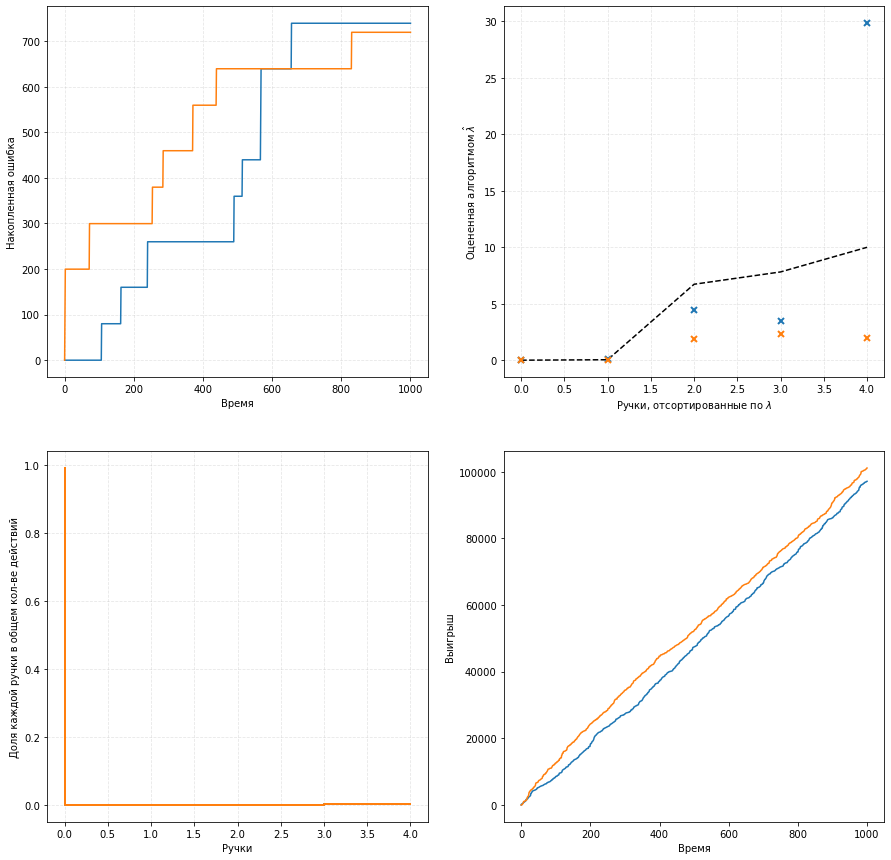

In [25]:
experiment(5, 1000, lambdas = [0.01, 6.73, 7.82, 10, 0.05])